In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import scipy.stats

# Explore Stock Data

In [2]:
#load csv into dataframe
df_stocks = pd.read_csv('TJstockdata.csv')

In [3]:
df_stocks.shape

(1729, 8)

In [4]:
df_stocks.dtypes

Stock        object
Date         object
Open        float64
High        float64
Low         float64
Close       float64
Volume        int64
Adjusted    float64
dtype: object

In [5]:
df_stocks.head()

,Stock,Date,Open,High,Low,Close,Volume,Adjusted
0,AMZN,4/24/2020,2417.000000,2420.429932,2382.00000,2410.219971,3831800,2410.219971
1,AMZN,4/27/2020,2443.199951,2444.879883,2363.00000,2376.000000,5645600,2376.000000
2,AMZN,4/28/2020,2372.100098,2373.500000,2306.00000,2314.080078,5269400,2314.080078
3,AMZN,4/29/2020,2330.010010,2391.889893,2310.00000,2372.709961,4591600,2372.709961
4,AMZN,4/30/2020,2419.840088,2475.000000,2396.01001,2474.000000,9534600,2474.000000


In [6]:
 # convert object into date time
df_stocks ['Date'] = pd.to_datetime(df_stocks ['Date'] , errors='coerce')

In [7]:
# save only date from the date time
df_stocks['Date'] = df_stocks['Date'].dt.date

In [8]:
min(df_stocks['Date'])

datetime.date(2020, 4, 24)

In [9]:
max(df_stocks['Date'])

datetime.date(2021, 4, 16)

In [10]:
#create df only for GME stock
df_stock_GME = df_stocks[df_stocks.Stock == 'GME']

In [11]:
df_stock_GME.shape

(247, 8)

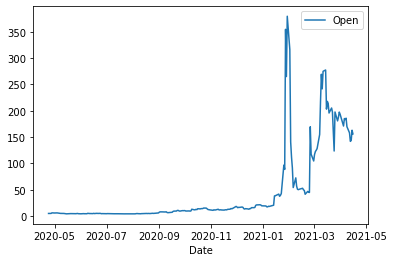

In [12]:
df_stock_GME.plot( x= 'Date', y = 'Open')
pyplot.show()

In [13]:
#create df only for SP500
df_stock_SP500 = df_stocks[df_stocks.Stock == 'SP500']

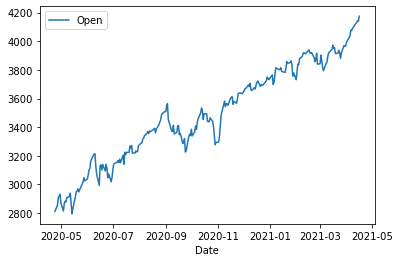

In [14]:
df_stock_SP500.plot( x= 'Date', y = 'Open')
pyplot.show()

# Explore Sentiment Data

In [15]:
#load csv into dataframe
df_reddit = pd.read_csv('posts_with_scores_and_ticker.csv')

In [ ]:
df_reddit.dropna

In [18]:
df_reddit.shape

(111600, 13)

In [19]:
df_reddit.dtypes

author             object
timestamp          object
id                 object
score               int64
text               object
scores             object
compound_score    float64
sentiment          object
AMC                  bool
NAKD                 bool
BB                   bool
GME                  bool
KOSS                 bool
dtype: object

In [20]:
df_reddit.head(2)

,author,timestamp,id,score,text,scores,compound_score,sentiment,AMC,NAKD,BB,GME,KOSS
0,WTCwrnr,"2021-03-17, 10:11:46",m75ago,1,*Processing img uzcczofdfmn61...*\n\nCan we he...,"{'neg': 0.02, 'neu': 0.831, 'pos': 0.149, 'com...",0.9033,pos,False,False,False,False,False
1,aresvswrld,"2021-03-17, 10:11:24",m75a5u,1,"I currently use Robinhood, and I have been for...","{'neg': 0.048, 'neu': 0.891, 'pos': 0.061, 'co...",0.1531,pos,False,False,False,True,False


In [21]:
#convert True/False in stock columns to 1/0
df_reddit = df_reddit*1

In [22]:
#convert categorical data to neumerical - pos/neg/neutral sentiment to 1/-1/0
df_reddit.loc[df_reddit.sentiment == 'pos', 'sentiment'] = 1
df_reddit.loc[df_reddit.sentiment == 'neg', 'sentiment'] = -1
df_reddit.loc[df_reddit.sentiment == 'neutral', 'sentiment'] = 0

In [23]:
# convert timestamp into date time
df_reddit['timestamp'] = pd.to_datetime(df_reddit['timestamp'], errors='coerce')

In [24]:
# save only date from the date time
df_reddit['timestamp'] = df_reddit['timestamp'].dt.date

In [25]:
min(df_reddit['timestamp'])

datetime.date(2020, 8, 14)

In [26]:
max(df_reddit['timestamp'])

datetime.date(2021, 3, 17)

In [27]:
#create df aggregated by daily sentiment across all posts for that day for all stocks
df_rd_daily = df_reddit.groupby("timestamp").agg({'id': 'count', 'timestamp': lambda x:x.value_counts().index[0], 'compound_score': np.mean, 'sentiment': lambda x:x.value_counts().index[0]})

In [28]:
df_rd_daily = df_rd_daily.rename(columns={'timestamp': 'Date', 'id':'#_of_mentions'})

In [29]:
df_rd_daily.shape

(210, 4)

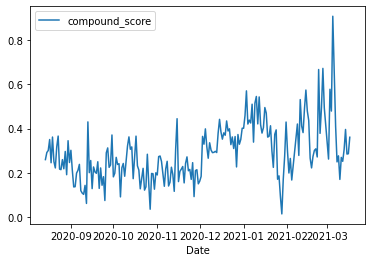

In [31]:
df_rd_daily.plot(x = 'Date', y = 'compound_score')
pyplot.show()

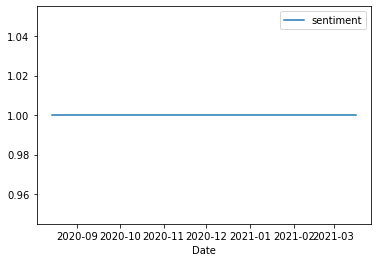

In [32]:
df_rd_daily.plot(x = 'Date', y = 'sentiment')
pyplot.show()

# Create Sentiment Timeseries for GME

In [33]:
#create df only for GME
df_rd_GME = df_reddit[df_reddit.GME == 1]

In [34]:
df_rd_GME.shape

(24213, 13)

In [35]:
df_rd_GME.dtypes

author             object
timestamp          object
id                 object
score               int64
text               object
scores             object
compound_score    float64
sentiment          object
AMC                 int32
NAKD                int32
BB                  int32
GME                 int32
KOSS                int32
dtype: object

In [36]:
df_rd_GME.head(3)

,author,timestamp,id,score,text,scores,compound_score,sentiment,AMC,NAKD,BB,GME,KOSS
1,aresvswrld,2021-03-17,m75a5u,1,"I currently use Robinhood, and I have been for...","{'neg': 0.048, 'neu': 0.891, 'pos': 0.061, 'co...",0.1531,1,0,0,0,1,0
15,bosshax,2021-03-17,m74p9p,1,**Short Interest report from S3 Partners updat...,"{'neg': 0.08, 'neu': 0.815, 'pos': 0.104, 'com...",0.8865,1,1,0,1,1,0
31,Far-Opportunity2942,2021-03-17,m74b9i,1,Do you all lack perspective? GME was $5-$10 fo...,"{'neg': 0.139, 'neu': 0.809, 'pos': 0.052, 'co...",-0.7621,-1,0,0,0,1,0


In [37]:
#create df aggregated by daily sentiment across all posts for that day (excuded 'id': lambda x:list(x))
df_rd_daily_GME = df_rd_GME.groupby("timestamp").agg({ 'id': 'count',  'timestamp': lambda x:x.value_counts().index[0], 'compound_score': np.mean, 'sentiment': lambda x:x.value_counts().index[0]})

In [38]:
df_rd_daily_GME = df_rd_daily_GME.rename(columns={'timestamp': 'Date', 'id':'#_of_mentions'})

In [39]:
df_rd_daily_GME.shape

(188, 4)

In [41]:
df_rd_daily_GME.head(5)

,#_of_mentions,Date,compound_score,sentiment
timestamp,,,,
2020-08-19,1,2020-08-19,0.620100,1
2020-08-21,1,2020-08-21,-0.847500,-1
2020-08-28,1,2020-08-28,0.458800,1
2020-08-29,1,2020-08-29,-0.714900,-1
2020-08-31,3,2020-08-31,0.404267,1


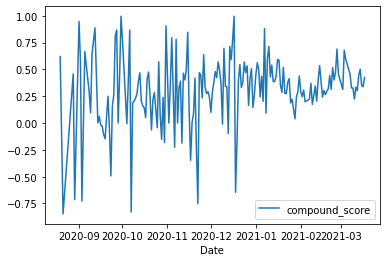

In [42]:
df_rd_daily_GME.plot(x = 'Date', y = 'compound_score')
pyplot.show()

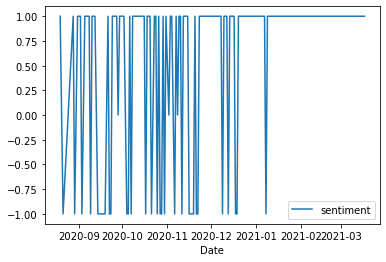

In [43]:
df_rd_daily_GME.plot(x = 'Date', y = 'sentiment')
pyplot.show()

# Select the same dates for both Stocks and Sentiment Series

In order to calculate and vizualize correlation timeseries need to be of the same lengh

In [44]:
df_stock_GME_dates = df_stock_GME['Date'] #dates for GME stock price
df_rd_dates = df_rd_daily['Date'] #dates from overall sentiment
df_rd_GME_dates = df_rd_daily_GME['Date'] #dates for GME sentiment

In [46]:
#common dates between GME stock price and overall sentiment
df_common_dates = df_stock_GME_dates[df_stock_GME_dates.isin(df_rd_dates)]

In [47]:
df_common_dates.shape

(145,)

In [49]:
#common dates between GME stock price and GME sentiment
df_GME_sntmt_common_dates = df_stock_GME_dates[df_stock_GME_dates.isin(df_rd_GME_dates)]

In [50]:
df_GME_sntmt_common_dates.shape

(134,)

In [52]:
#create Stock df only with the common dates between GME stock and overall sentiment series
df_stock_GME_all = df_stock_GME.loc[df_stock_GME['Date'].isin(df_common_dates)]

In [54]:
df_stock_GME_all.shape

(145, 8)

In [55]:
#create Stock df only with the common dates between GME stock and GME sentiment series
df_stock_GME = df_stock_GME.loc[df_stock_GME['Date'].isin(df_GME_sntmt_common_dates)]

In [56]:
df_stock_GME.shape

(134, 8)

In [58]:
#create Sentiment df only with the common dates between GME stock and overall sentiment series
df_rd_daily = df_rd_daily.loc[df_rd_daily['Date'].isin(df_common_dates)]

In [59]:
df_rd_daily.shape

(145, 4)

In [60]:
#create Sentiment df only with the common dates between GME stock and only GME sentiment series
df_rd_daily_GME = df_rd_daily_GME.loc[df_rd_daily_GME['Date'].isin(df_GME_sntmt_common_dates)]

In [61]:
df_rd_daily_GME.shape

(134, 4)

In [62]:
df_rd_daily_GME.head(3)

,#_of_mentions,Date,compound_score,sentiment
timestamp,,,,
2020-08-19,1,2020-08-19,0.6201,1
2020-08-21,1,2020-08-21,-0.8475,-1
2020-08-28,1,2020-08-28,0.4588,1


In [63]:
df_stock_GME.head(3)

,Stock,Date,Open,High,Low,Close,Volume,Adjusted
822,GME,2020-08-19,4.8,4.84,4.64,4.72,2612600,4.72
824,GME,2020-08-21,4.6,5.60,4.60,5.03,10642600,5.03
829,GME,2020-08-28,5.3,5.57,5.22,5.39,4236900,5.39


In [64]:
#create SP500 df only with the common dates between SP500 and overall sentiment series
df_stock_SP500 = df_stock_SP500.loc[df_stock_SP500['Date'].isin(df_common_dates)]

In [65]:
df_stock_SP500.shape

(145, 8)

# Vizualize both series on the same graph

### GME Sentiment Compount Score vs GME Stock Open Price

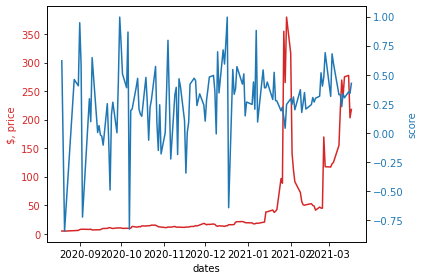

In [66]:
#visuzalize both timeseries on the same plot
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('dates')
ax1.set_ylabel('$, price', color=color)
ax1.plot(df_stock_GME['Date'], df_stock_GME[ 'Open'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('score', color=color)  # we already handled the x-label with ax1
ax2.plot(df_rd_daily_GME['Date'], df_rd_daily_GME[ 'compound_score'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### GME Sentiment Compount Score vs GME Stock Close Price

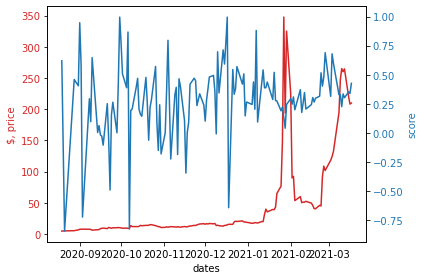

In [67]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('dates')
ax1.set_ylabel('$, price', color=color)
ax1.plot(df_stock_GME['Date'], df_stock_GME[ 'Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('score', color=color)  # we already handled the x-label with ax1
ax2.plot(df_rd_daily_GME['Date'], df_rd_daily_GME[ 'compound_score'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### GME Sentiment Compount Score vs GME Stock Trading Volume

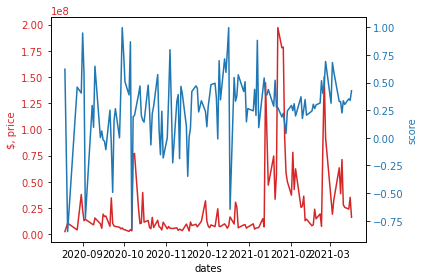

In [68]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('dates')
ax1.set_ylabel('$, price', color=color)
ax1.plot(df_stock_GME['Date'], df_stock_GME[ 'Volume'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('score', color=color)  # we already handled the x-label with ax1
ax2.plot(df_rd_daily_GME['Date'], df_rd_daily_GME[ 'compound_score'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### GME Sentiment vs GME Stock Open Price

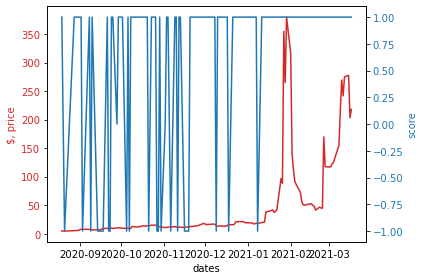

In [69]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('dates')
ax1.set_ylabel('$, price', color=color)
ax1.plot(df_stock_GME['Date'], df_stock_GME[ 'Open'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('score', color=color)  # we already handled the x-label with ax1
ax2.plot(df_rd_daily_GME['Date'], df_rd_daily_GME[ 'sentiment'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### GME Sentiment vs GME Stock Trading Volume

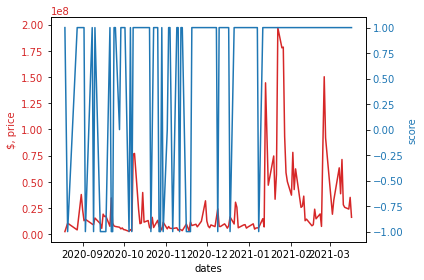

In [70]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('dates')
ax1.set_ylabel('$, price', color=color)
ax1.plot(df_stock_GME['Date'], df_stock_GME[ 'Volume'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('score', color=color)  # we already handled the x-label with ax1
ax2.plot(df_rd_daily_GME['Date'], df_rd_daily_GME[ 'sentiment'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### GME num of mentions on Reddit vs GME Stock Open Price

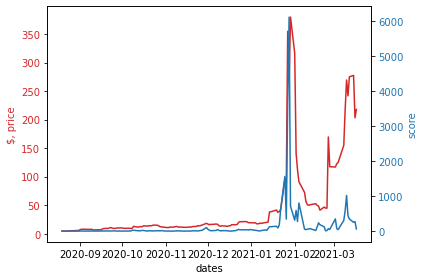

In [74]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('dates')
ax1.set_ylabel('$, price', color=color)
ax1.plot(df_stock_GME['Date'], df_stock_GME[ 'Open'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('score', color=color)  # we already handled the x-label with ax1
ax2.plot(df_rd_daily_GME['Date'], df_rd_daily_GME[ '#_of_mentions'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### GME num of mentions on Reddit vs GME Stock Trading Volume

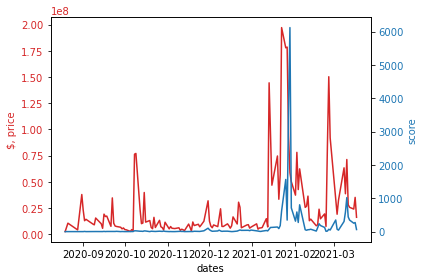

In [75]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('dates')
ax1.set_ylabel('$, price', color=color)
ax1.plot(df_stock_GME['Date'], df_stock_GME[ 'Volume'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('score', color=color)  # we already handled the x-label with ax1
ax2.plot(df_rd_daily_GME['Date'], df_rd_daily_GME[ '#_of_mentions'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Overall Reddit Compound Score vs GME Stock Open Price

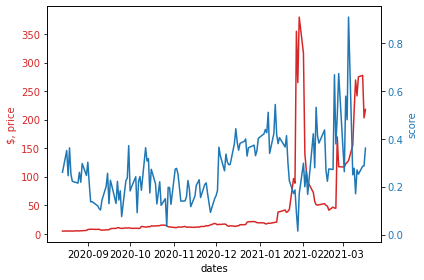

In [76]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('dates')
ax1.set_ylabel('$, price', color=color)
ax1.plot(df_stock_GME_all['Date'], df_stock_GME_all[ 'Open'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('score', color=color)  # we already handled the x-label with ax1
ax2.plot(df_rd_daily['Date'], df_rd_daily[ 'compound_score'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Overall Reddit Compound Score vs GME Stock Trading Volume

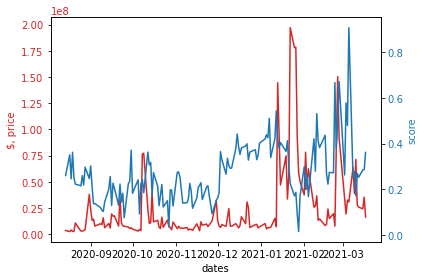

In [77]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('dates')
ax1.set_ylabel('$, price', color=color)
ax1.plot(df_stock_GME_all['Date'], df_stock_GME_all[ 'Volume'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('score', color=color)  # we already handled the x-label with ax1
ax2.plot(df_rd_daily['Date'], df_rd_daily[ 'compound_score'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Overall Reddit Sentiment vs SP500

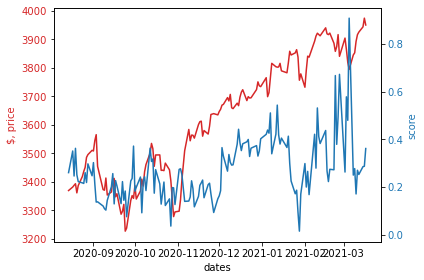

In [78]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('dates')
ax1.set_ylabel('$, price', color=color)
ax1.plot(df_stock_SP500['Date'], df_stock_SP500[ 'Open'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('score', color=color)  # we already handled the x-label with ax1
ax2.plot(df_rd_daily['Date'], df_rd_daily[ 'compound_score'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Overall Reddit Sentiment vs SP500 Volume

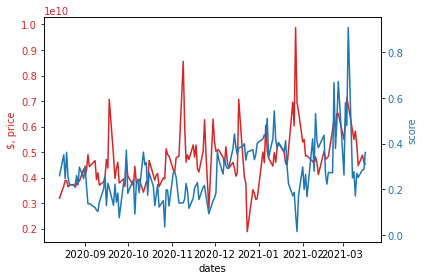

In [79]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('dates')
ax1.set_ylabel('$, price', color=color)
ax1.plot(df_stock_SP500['Date'], df_stock_SP500[ 'Volume'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('score', color=color)  # we already handled the x-label with ax1
ax2.plot(df_rd_daily['Date'], df_rd_daily[ 'compound_score'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Calculate different correlation scores

### Correlation scores for GME stock vs GME Sentiment 

To calculate correlations between the time series they must be 1D arrays not df or xD arrays

In [80]:
#GME Open price array
df_GME_open = df_stock_GME['Open']

In [81]:
#GME Close price array
df_GME_close = df_stock_GME['Close']

In [82]:
#GME volume array
df_GME_volume = df_stock_GME['Volume']

In [83]:
#Overall Reddit sentiment compound score array
df_rd_score = df_rd_daily['compound_score']

In [84]:
#GME compound score array
df_rd_GME_score = df_rd_daily_GME['compound_score']

In [85]:
#GME compound score array
df_rd_GME_sentiment = df_rd_daily_GME['sentiment']

In [91]:
#coeffecient correlation score
print('GME sentiment to stock Close price coeffecient correlation score')
corr_close = np.corrcoef(df_GME_close, df_rd_GME_score)
print(corr_close)

GME sentiment to stock Close price coeffecient correlation score
[[1.         0.04290722]
 [0.04290722 1.        ]]


In [93]:
print('GME sentiment to stock Close price Pearsons correlation score')
scipy.stats.pearsonr(df_GME_close, df_rd_GME_score)    # Pearson's r

GME sentiment to stock Close price Pearsons correlation score


(0.04290721625907753, 0.6225352286518213)

In [95]:
print('GME sentiment to stock Close price Spearmans correlation score')
scipy.stats.spearmanr(df_GME_close, df_rd_GME_score)   # Spearman's rho

GME sentiment to stock close price Spearmans correlation score


SpearmanrResult(correlation=0.11593469212715574, pvalue=0.18221339795316177)

In [98]:
print('GME sentiment to stock Close price Kendalls tau correlation score')
scipy.stats.kendalltau(df_GME_close, df_rd_GME_score)  # Kendall's tau

GME sentiment to stock Close price Kendalls tau correlation score


KendalltauResult(correlation=0.07711303225141053, pvalue=0.18636563597900813)

In [99]:
print('GME sentiment to Trading Volume Pearsons correlation score')
scipy.stats.pearsonr(df_GME_volume, df_rd_GME_score)    # Pearson's r

GME sentiment to Trading Volume Pearsons correlation score


(0.009009107654257508, 0.9177145454870888)

In [100]:
print('GME sentiment to Trading Volume Spearmans correlation score')
scipy.stats.spearmanr(df_GME_volume, df_rd_GME_sentiment)   # Spearman's rho

GME sentiment to Trading Volume Spearmans correlation score


SpearmanrResult(correlation=0.21958287854241354, pvalue=0.010795984255035217)

In [101]:
print('GME sentiment to stock Trading Volume Kendalls tau correlation score')
scipy.stats.kendalltau(df_GME_volume, df_rd_GME_score)  # Kendall's tau

GME sentiment to stock Trading Volume Kendalls tau correlation score


KendalltauResult(correlation=-0.061276022766354764, pvalue=0.2936282354062998)

### Correlation scores for GME stock mentions on Reddit vs GME Stock

In [110]:
#GME number of mentions on Reddit
df_rd_mentioned_GME = df_rd_daily_GME['#_of_mentions']

In [113]:
#coeffecient correlation score
print('GME num of mentions  to stock Close price coeffecient correlation score')
corr_close = np.corrcoef(df_GME_close, df_rd_mentioned_GME)
print(corr_close)

GME num of mentions  to stock Close price coeffecient correlation score
[[1.        0.5131486]
 [0.5131486 1.       ]]


In [114]:
print('GME num of mentions to stock Close price Pearsons correlation score')
scipy.stats.pearsonr(df_GME_close, df_rd_mentioned_GME)    # Pearson's r

GME num of mentions to stock Close price Pearsons correlation score


(0.5131486009403672, 2.3029931167488668e-10)

In [115]:
print('GME num of mentions to stock Close price Kendalls tau correlation score')
scipy.stats.kendalltau(df_GME_close, df_rd_mentioned_GME)  # Kendall's tau

GME num of mentions to stock Close price Kendalls tau correlation score


KendalltauResult(correlation=0.7028862025334904, pvalue=1.03809621623749e-32)

In [116]:
print('GME num of mentions to stock Close price Spearmans correlation score')
scipy.stats.spearmanr(df_GME_close, df_rd_mentioned_GME)   # Spearman's rho

GME num of mentions to stock Close price Spearmans correlation score


SpearmanrResult(correlation=0.8820561330715383, pvalue=5.632979226732468e-45)

In [117]:
print('GME num of mentions to Trading Volume Spearmans correlation score')
scipy.stats.spearmanr(df_GME_volume, df_rd_mentioned_GME)   # Spearman's rho

GME num of mentions to Trading Volume Spearmans correlation score


SpearmanrResult(correlation=0.6767088182033575, pvalue=2.844930757908771e-19)

In [118]:
print('GME num of mentions  to stock Trading Volume Kendalls tau correlation score')
scipy.stats.kendalltau(df_GME_volume, df_rd_mentioned_GME)  # Kendall's tau

GME num of mentions  to stock Trading Volume Kendalls tau correlation score


KendalltauResult(correlation=0.49293724683807477, pvalue=6.568173438638893e-17)

### Correlation scores for SP500 vs Overall Reddit Sentiment Compound Score

In [102]:
#SP500 Open price
df_SP500_open = df_stock_SP500['Open']

In [103]:
#SP500 volume array
df_SP500_volume = df_stock_SP500['Volume']

In [104]:
#coeffecient correlation score
corr_close = np.corrcoef(df_SP500_open, df_rd_score)
print(corr_close)

[[1.         0.48626572]
 [0.48626572 1.        ]]


In [105]:
#Pearson's for SP500 and overall Reddit compound score
scipy.stats.pearsonr(df_SP500_open, df_rd_score)

(0.4862657214367371, 5.625366461858624e-10)

In [106]:
#Pearson's for SP500 volume and overall Reddit compound score
scipy.stats.pearsonr(df_SP500_volume, df_rd_score)

(0.11798624152269827, 0.15754177412091436)

In [107]:
scipy.stats.spearmanr(df_SP500_open, df_rd_score)   # Spearman's rho

SpearmanrResult(correlation=0.5053259329239489, pvalue=9.036596718516804e-11)

In [108]:
scipy.stats.kendalltau(df_SP500_open, df_rd_score)  # Kendall's tau

KendalltauResult(correlation=0.3425287356321839, pvalue=9.774852807365392e-10)

# Generate a correlation heatmap

### Heatmap of feature correlation between GME stock data and GME reddit sentiment

In [119]:
#merge stock df and GME sentiment df into one df to create correlation heatmap
df_merged_GME = pd.merge(left=df_stock_GME, right=df_rd_daily_GME, left_on='Date', right_on = 'Date')

<AxesSubplot:>

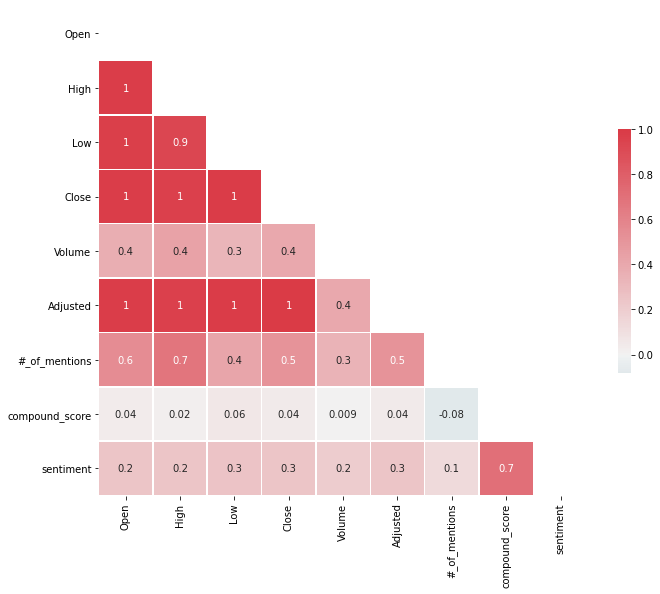

In [120]:
# Compute the correlation matrix
corr = df_merged_GME.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1., center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True, fmt='.1g')

### Heatmap of feature correlation between GME stock data and Overall reddit sentiment

In [121]:
#merge GME stock df and overall sentiment df into one df to create correlation heatmap
df_merged_GME2 = pd.merge(left=df_stock_GME_all, right=df_rd_daily, left_on='Date', right_on = 'Date')

<AxesSubplot:>

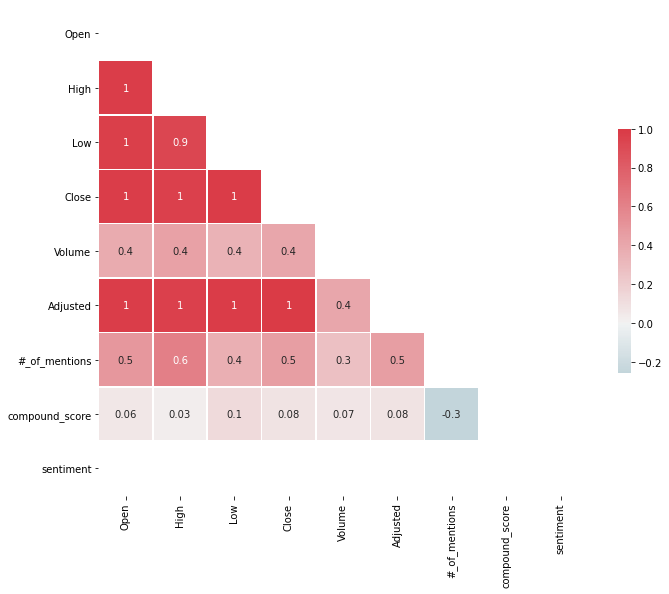

In [122]:
# Compute the correlation matrix
corr = df_merged_GME2.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1., center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True, fmt='.1g')

### Heatmap of feature correlation between SP500 data and Overall Reddit Sentiment

In [123]:
#merge SP500 df and overall sentiment df into one df to create correlation heatmap
df_merged_SP500 = pd.merge(left=df_stock_SP500, right=df_rd_daily, left_on='Date', right_on = 'Date')

<AxesSubplot:>

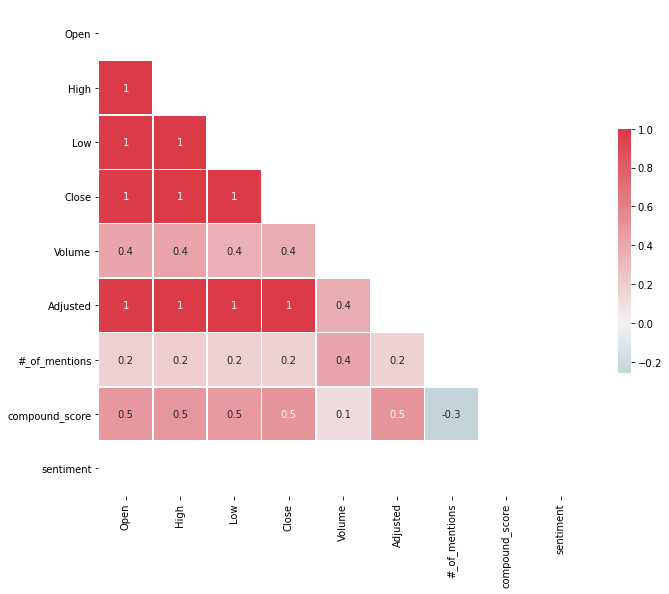

In [124]:
# Compute the correlation matrix
corr = df_merged_SP500.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1., center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True, fmt='.1g')